# Постановка задачи

# Решение

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, init_printing, integrate, cos
import math

In [3]:
# Получим значение интеграла аналитически
t = symbols('t')
init_printing(use_unicode=False)
integrate(((t**3)*cos(t)),t)

In [4]:
# Неопределенный интеграл:
def I(x):
    return x**3 * math.sin(x)+3*x**2 * math.cos(x) - 6* x * math.sin(x) - 6* math.cos(x)

In [64]:
# Определенный интеграл:
I_ = I(2*math.pi) - I(0)

In [6]:
# Или можно получить значение неопределенного интеграла сразу:
t = symbols('t')
init_printing(use_unicode=True)
I_ = integrate(((t**3)*cos(t)),(t,0,2*math.pi))

In [ ]:
# Численные методы

In [7]:
def f(x):
    return ((x**3)*math.cos(x))

N =  7 , Integral ≈  86.59 , Error ≈  31.85
N =  9 , Integral ≈  103.32 , Error ≈  15.12
N =  13 , Integral ≈  112.48 , Error ≈  5.96
N =  17 , Integral ≈  115.22 , Error ≈  3.21
N =  25 , Integral ≈  117.05 , Error ≈  1.39
N =  31 , Integral ≈  117.56 , Error ≈  0.88


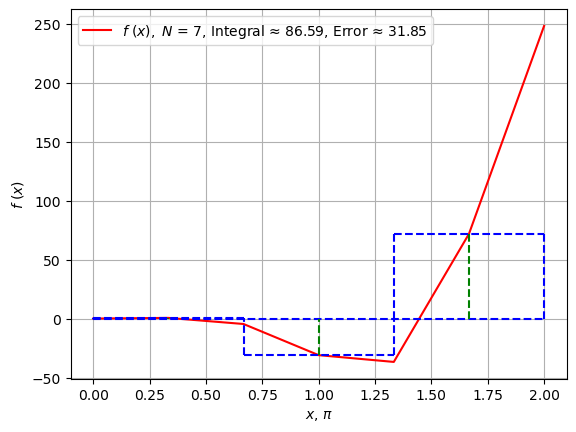

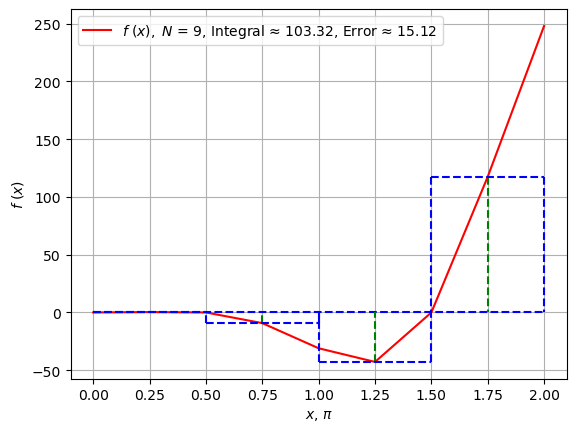

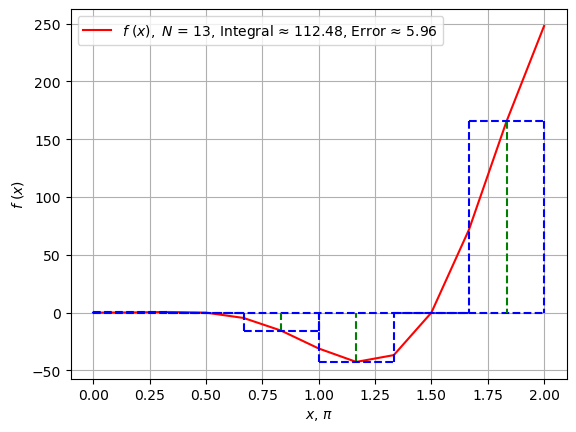

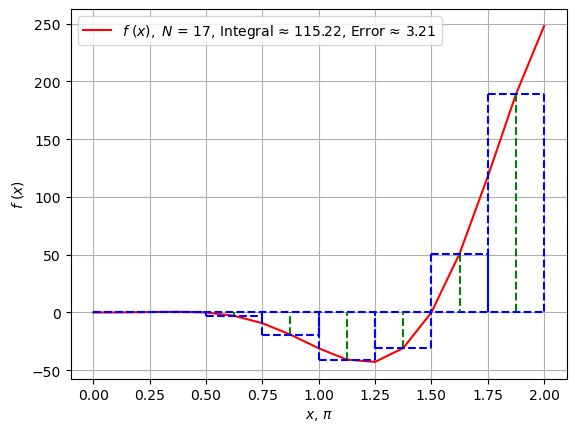

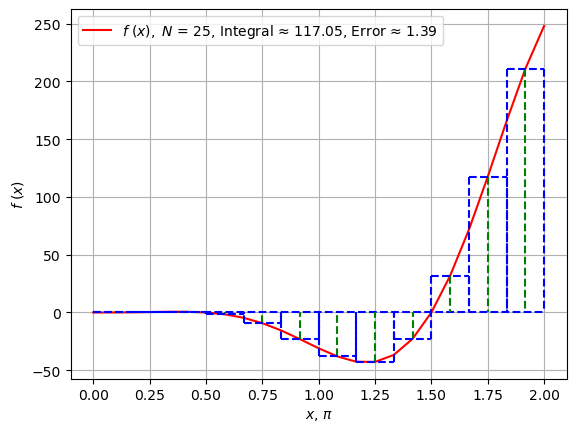

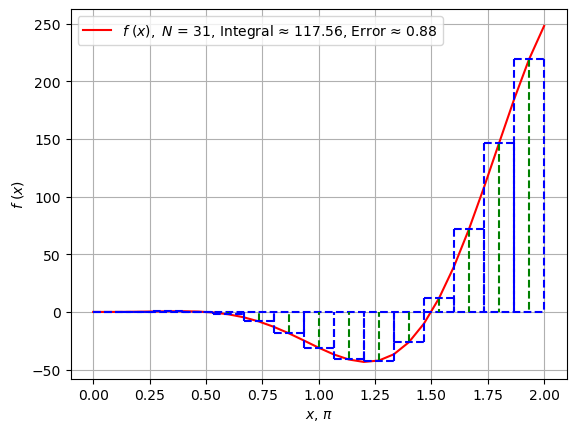

In [55]:
# Метод прямоугольников для равноотстоящих узловых точек
a = 0
b = 2 * math.pi
N_ = 7,9,13,17,25,31
for N in N_:
    h = (b-a)/(N-1)
    x_ = np.zeros(N)
    square = np.zeros(N)
    f_ = np.zeros(N)
    x__ = np.zeros(N-1)
    f__ = np.zeros(N-1)
    for i in range(0,N):
        x_[i] = a + h*i
        f_[i] = f(x_[i])    
    for i in range(1, N ,2):
        square[i] = (x_[i+1] - x_[i-1]) * f(x_[i])
    print('N = ',str(N),', Integral ≈ ', str(round(square.sum(),2)), ', Error ≈ ', str(round((I_- square.sum()),2)))
    
    plt.figure()
    plt.plot(x_/math.pi,f_,color='r',label='$f$ $(x),$ $N$ = '+ str(N) 
             + ', Integral ≈ ' + str(round(square.sum(),2)) + ', Error ≈ ' + str(round((I_- square.sum()),2)))
    plt.grid(visible=True, which='major', axis='both')
    plt.xlabel('$x$, $π$')
    plt.ylabel('$f$ $(x)$')
    plt.legend()
    plt.hlines(y = 0, color='b', xmin = a/math.pi, xmax = b/math.pi, linestyle='dashed')
    for k in range(1,N-1,2):
        plt.vlines(x = x_[k-1]/math.pi, ymin=f_[k], ymax=0, colors = 'b',linestyles='dashed')
        plt.vlines(x = x_[k]/math.pi, ymin=f_[k], ymax=0, colors = 'g',linestyles='dashed')
        plt.vlines(x = x_[k+1]/math.pi, ymin=f_[k], ymax=0, colors = 'b',linestyles='dashed')
        plt.hlines(y = f_[k], color='b', xmin = x_[k-1]/math.pi, xmax = x_[k+1]/math.pi, linestyle='dashed')
    figname = 'rect_f_N_' + str(N) + '.png'
    plt.savefig(figname)

In [66]:
# Экстраполяция Ричардсона для метода прямоугольников
# Количество отрезков = количество точек - 1
# N = 7 -> 2N = 13
p = 3
S_N_7 = 86.59
S_2N_13 = 112.48 
S_13 = ((2**p)*(S_N_7) - S_2N_13)/((2**p) - 1)
print('Integral = ',round(S_13,2), ', Error ≈ ', str(round((I_- S_13),2)))

Integral =  82.89 , Error ≈  35.54


In [ ]:
N =  7 , Integral ≈  86.59 , Error ≈  31.85
N =  9 , Integral ≈  103.32 , Error ≈  15.12
N =  13 , Integral ≈  112.48 , Error ≈  5.96
N =  17 , Integral ≈  115.22 , Error ≈  3.21
N =  25 , Integral ≈  117.05 , Error ≈  1.39
N =  31 , Integral ≈  117.56 , Error ≈  0.88

In [ ]:
N =  13 , Integral ≈  112.48 , Error ≈  5.96
N =  17 , Integral ≈  115.22 , Error ≈  3.21
N =  25 , Integral ≈  117.05 , Error ≈  1.39

N =  7 , Integral ≈  129.88 , Error ≈  -11.44
N =  9 , Integral ≈  124.72 , Error ≈  -6.28
N =  13 , Integral ≈  121.18 , Error ≈  -2.74
N =  17 , Integral ≈  119.97 , Error ≈  -1.53
N =  25 , Integral ≈  119.11 , Error ≈  -0.68
N =  31 , Integral ≈  118.87 , Error ≈  -0.43


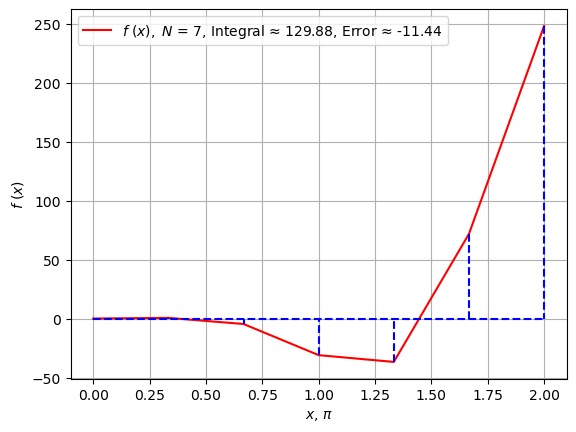

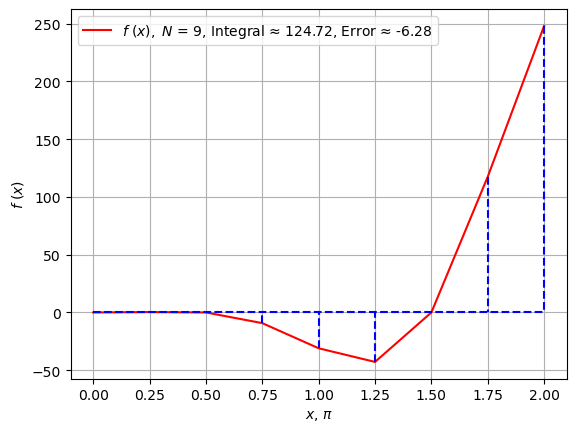

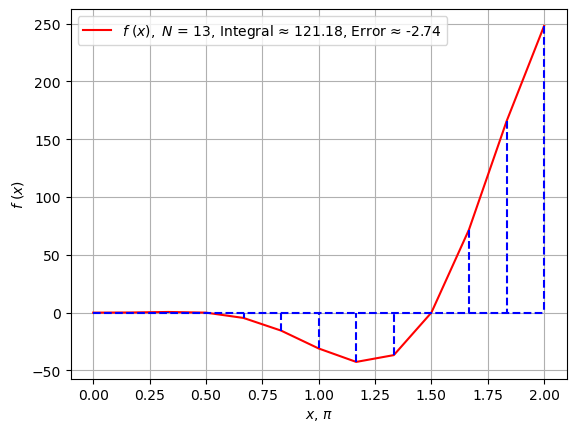

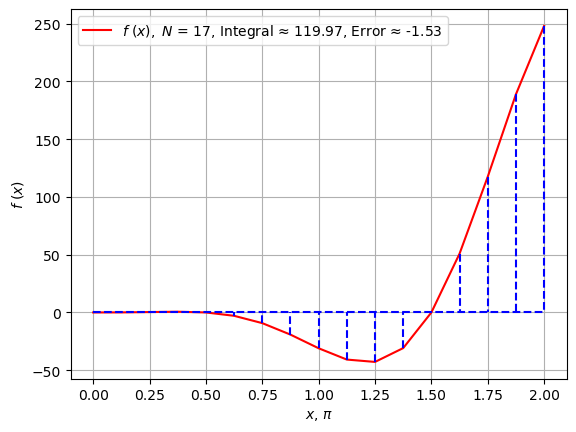

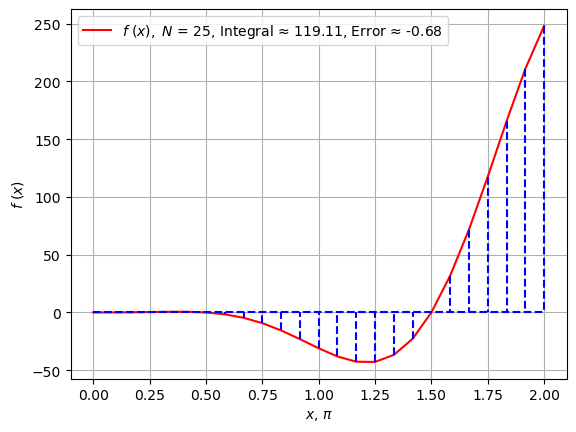

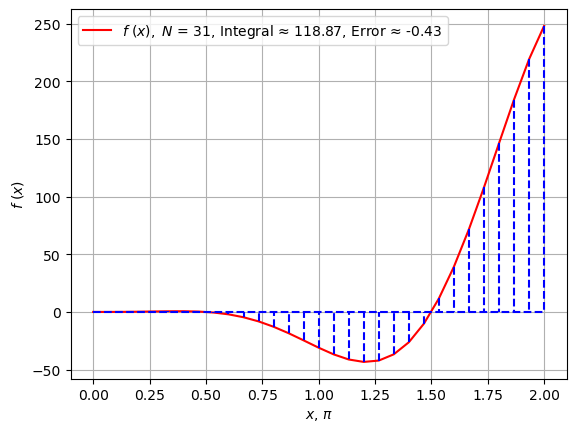

In [56]:
# Метод трапеций
a = 0
b = 2 * math.pi
N_ = 7,9,13,17,25,31
for N in N_:
    h = (b-a)/(N-1)
    x_ = np.zeros(N)
    square = np.zeros(N)
    f_ = np.zeros(N)
    for i in range(0,N):
        x_[i] = a + h*i
        f_[i] = f(x_[i])    
    for i in range(0, N-1):
        square[i] = h*( f(x_[i]) + f(x_[i+1]) )/2
    print('N = ',str(N),', Integral ≈ ', str(round(square.sum(),2)), ', Error ≈ ', str(round((I_- square.sum()),2)))
    
    plt.figure()
    plt.plot(x_/math.pi,f_,color='r',label='$f$ $(x),$ $N$ = '+ str(N) 
             + ', Integral ≈ ' + str(round(square.sum(),2)) + ', Error ≈ ' + str(round((I_- square.sum()),2)))
    plt.grid(visible=True, which='major', axis='both')
    plt.xlabel('$x$, $π$')
    plt.ylabel('$f$ $(x)$')
    plt.legend()
    plt.hlines(y = 0, color='b', xmin = a/math.pi, xmax = b/math.pi, linestyle='dashed')
    #for k in range(0,N):
        #plt.vlines(x = x_[k-1]/math.pi, ymin=f_[k], ymax=0, colors = 'b',linestyles='dashed')
    plt.vlines(x = x_/math.pi, ymin=f_, ymax=0, colors = 'b',linestyles='dashed')
        #plt.vlines(x = x_[k+1]/math.pi, ymin=f_[k], ymax=0, colors = 'b',linestyles='dashed')
        #plt.hlines(y = f_[k], color='b', xmin = x_[k-1]/math.pi, xmax = x_[k+1]/math.pi, linestyle='dashed')
    figname = 'trap_f_N_' + str(N) + '.png'
    plt.savefig(figname)

In [67]:
# Экстраполяция Ричардсона для метода трапеций
# Количество отрезков = количество точек - 1
# N = 7 -> 2N = 13
p = 3
S_N_7 = 129.88
S_2N_13 = 121.18
S_13 = ((2**p)*S_N_7 - S_2N_13)/((2**p) - 1)
print('Integral = ',round(S_13,2), ', Error ≈ ', str(round((I_- S_13),2)))

Integral =  131.12 , Error ≈  -12.69


In [ ]:
N =  7 , Integral ≈  129.88 , Error ≈  -11.44
N =  9 , Integral ≈  124.72 , Error ≈  -6.28
N =  13 , Integral ≈  121.18 , Error ≈  -2.74
N =  17 , Integral ≈  119.97 , Error ≈  -1.53
N =  25 , Integral ≈  119.11 , Error ≈  -0.68
N =  31 , Integral ≈  118.87 , Error ≈  -0.43

In [62]:
# Метод Симпсона
a = 0
b = 2 * math.pi
n_ = 3, 4, 6, 8, 12, 15 # N = 2n+1 = 7, 9, 13, 17, 25, 31
for n in n_:
    N = 2*n + 1
    h = (b-a)/(2*n)
    x_ = np.zeros(2*n+1)
    square_ = np.zeros(2*n)
    f_ = np.zeros(2*n+1)
    for i in range(0,2*n+1):
        x_[i] = a + h*i
        f_[i] = f(x_[i])
    for i in range(0,n):
        square_[2*i+1] = 4*f(x_[2*i+1])
    for i in range(0,n-1):
        square_[2*i+2] = 2*f(x_[2*i+2]) 
    square = h*(f(x_[0]) + f(x_[2*n]) + square_.sum())/3
    print('N = ',str(N),', Integral ≈ ', str(round(square,2)), ', Error ≈ ', str(round((I_- square),2)))

N =  7 , Integral ≈  115.45 , Error ≈  2.99
N =  9 , Integral ≈  117.58 , Error ≈  0.85
N =  13 , Integral ≈  118.28 , Error ≈  0.16
N =  17 , Integral ≈  118.39 , Error ≈  0.05
N =  25 , Integral ≈  118.43 , Error ≈  0.01
N =  31 , Integral ≈  118.43 , Error ≈  0.0


In [68]:
# Экстраполяция Ричардсона для метода Симпсона
# Количество отрезков = количество точек - 1
# N = 7 -> 2N = 13
p = 5
S_N_7 = 115.45
S_2N_13 = 118.28
S_13 = ((2**p)*S_N_7 - S_2N_13)/((2**p) - 1)
print('Integral = ',round(S_13,2), ', Error ≈ ', str(round((I_- S_13),2)))

Integral =  115.36 , Error ≈  3.08


In [32]:
# При интерполяции функции Сплайнами
def S(i,t):
    buf1 = ((t - x_[i+1])**2) * (2 * (t - x_[i]) + h) * (f_[i]) / (h**3)
    buf2 = ((t - x_[i])**2) * (2 * (x_[i+1] - t) + h) * (f_[i+1]) / (h**3)
    buf3 = ((t - x_[i+1])**2) * (t - x_[i]) * (m_[i]) / (h**2)
    buf4 = ((t - x_[i])**2) * (t - x_[i+1]) * (m_[i]) / (h**2)
    return (buf1 + buf2 + buf3 + buf4)

N =  7 , Integral ≈  129.88 , Error ≈  -11.44
N =  9 , Integral ≈  124.72 , Error ≈  -6.28
N =  13 , Integral ≈  121.18 , Error ≈  -2.74
N =  17 , Integral ≈  119.97 , Error ≈  -1.53
N =  25 , Integral ≈  119.11 , Error ≈  -0.68
N =  31 , Integral ≈  118.87 , Error ≈  -0.43


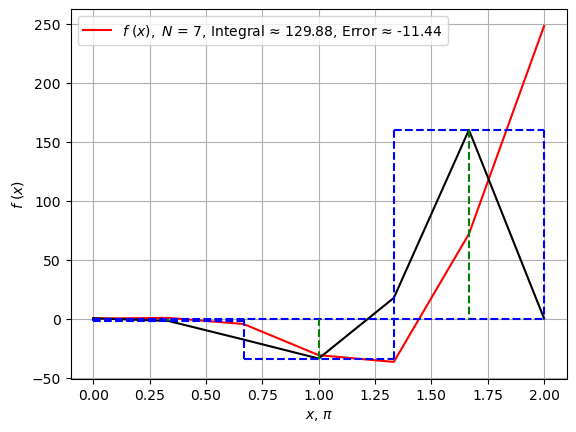

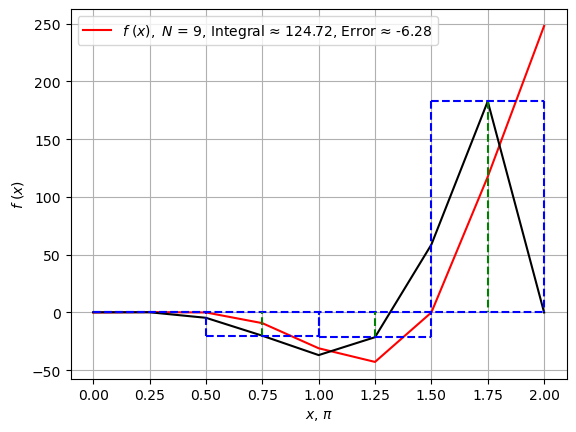

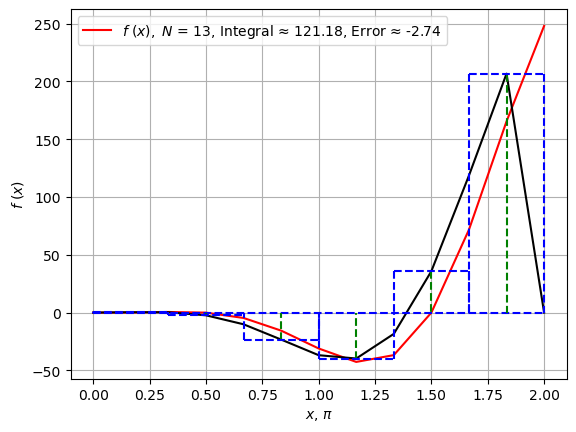

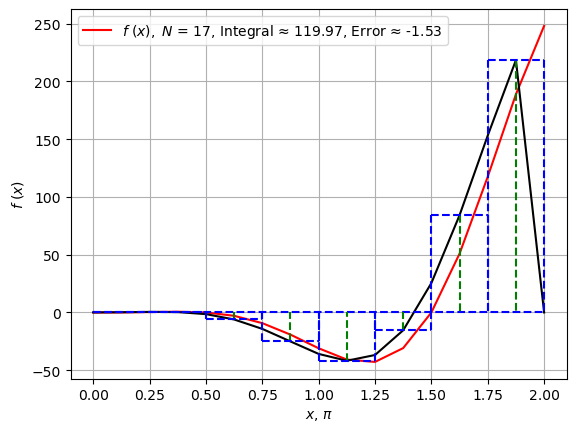

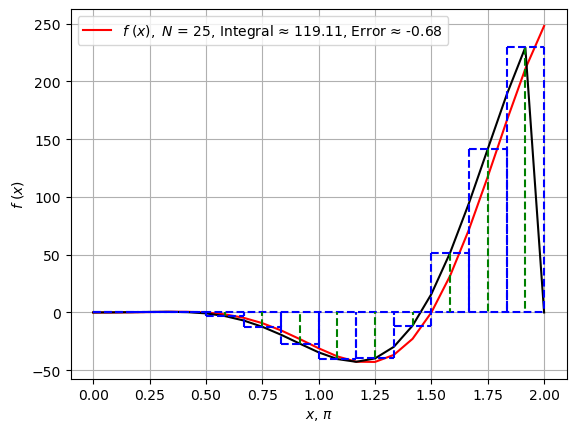

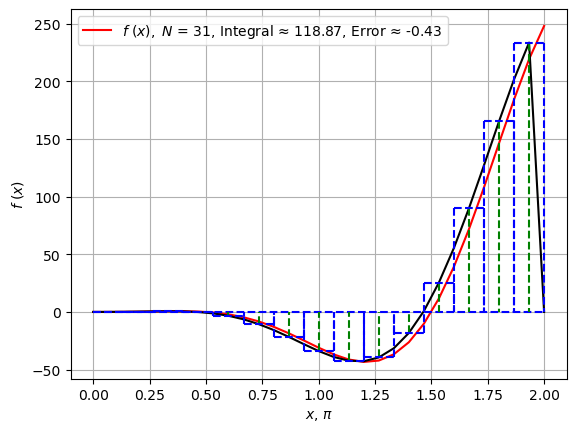

In [58]:
# Метод прямоугольников для равноотстоящих узловых точек
a = 0
b = 2 * math.pi
N_ = 7,9,13,17,25,31
for N in N_:
    
    h = (b-a)/(N-1)
    x_ = np.zeros(N)
    m_ = np.zeros(N)
    square = np.zeros(N)
    f_ = np.zeros(N)
    S_ = np.zeros(N)

    for i in range(0,N):
        x_[i] = a + h*i
        f_[i] = f(x_[i])    

    m_[0] = (-3*f_[0] + 4*f_[1] - f_[2])/(2*h)
    m_[N-1] = (3*f_[N-1] - 4*f_[N-2] + f_[N-3])/(2*h)

    for i in range(1,N-1):
        m_[i] = (f_[i+1] - f_[i-1])/(2*h)
    
    for i in range(0, N-1):
        S_[i] = S(i=i,t=(x_[i]+(x_[i+1]-x_[i])/2))
        square[i] = (x_[i+1] - x_[i]) * S_[i]
    print('N = ',str(N),', Integral ≈ ', str(round(square.sum(),2)), ', Error ≈ ', str(round((I_- square.sum()),2)))
    plt.figure()
    plt.plot(x_/math.pi,f_,color='r',label='$f$ $(x),$ $N$ = '+ str(N) 
             + ', Integral ≈ ' + str(round(square.sum(),2)) + ', Error ≈ ' + str(round((I_- square.sum()),2)))
    plt.plot(x_/math.pi,S_,color='black')
    plt.grid(visible=True, which='major', axis='both')
    plt.xlabel('$x$, $π$')
    plt.ylabel('$f$ $(x)$')
    plt.legend()
    plt.hlines(y = 0, color='b', xmin = a/math.pi, xmax = b/math.pi, linestyle='dashed')
    for k in range(1,N-1,2):
        plt.vlines(x = x_[k-1]/math.pi, ymin=S_[k], ymax=0, colors = 'b',linestyles='dashed')
        plt.vlines(x = x_[k]/math.pi, ymin=S_[k], ymax=0, colors = 'g',linestyles='dashed')
        plt.vlines(x = x_[k+1]/math.pi, ymin=S_[k], ymax=0, colors = 'b',linestyles='dashed')
        plt.hlines(y = S_[k], color='b', xmin = x_[k-1]/math.pi, xmax = x_[k+1]/math.pi, linestyle='dashed')
    figname = 'spline_rect_f_N_' + str(N) + '.png'
    plt.savefig(figname)

In [70]:
# Экстраполяция Ричардсона для метода прямоугольников
# Количество отрезков = количество точек - 1
# N = 7 -> 2N = 13
p = 3
S_N_7 = 129.88
S_2N_13 = 121.18
S_13 = ((2**p)*S_N_7 - S_2N_13)/((2**p) - 1)
print('Integral = ',round(S_13,2), ', Error ≈ ', str(round((I_- S_13),2)))

Integral =  131.12 , Error ≈  -12.69


In [ ]:
N =  7 , Integral ≈  129.88 , Error ≈  -11.44
N =  9 , Integral ≈  124.72 , Error ≈  -6.28
N =  13 , Integral ≈  121.18 , Error ≈  -2.74
N =  17 , Integral ≈  119.97 , Error ≈  -1.53
N =  25 , Integral ≈  119.11 , Error ≈  -0.68
N =  31 , Integral ≈  118.87 , Error ≈  -0.43

In [52]:
# Метод трапеций для равноотстоящих узловых точек
a = 0
b = 2 * math.pi
N_ = 7,8,9,13,14,16,17,25,31
for N in N_:
    
    h = (b-a)/(N-1)
    x_ = np.zeros(N)
    m_ = np.zeros(N)
    square = np.zeros(2*N-1)
    f_ = np.zeros(N)
    S_ = np.zeros(N)

    for i in range(0,N):
        x_[i] = a + h*i
        f_[i] = f(x_[i])    

    m_[0] = (-3*f_[0] + 4*f_[1] - f_[2])/(2*h)
    m_[N-1] = (3*f_[N-1] - 4*f_[N-2] + f_[N-3])/(2*h)

    for i in range(1,N-1):
        m_[i] = (f_[i+1] - f_[i-1])/(2*h)
    
    for i in range(2, N-1, 2):
        S_[i-2] = S(i=i,t=(x_[i-2]+(x_[i-1]-x_[i-2])/2))
        square[i-2] = h*( f_[i-2] + S_[i-2] )/2
        
   # for i in range(1,N-1,2):
    #    S_[i-1] = S(i=i,t=(x_[i-2]+(x_[i-1]-x_[i-2])/2))
        square[i-1] = h *( f_[i-1] + S_[i-2] )/2
    print('N = ',str(N),', Integral ≈ ', str(round(square.sum(),2)), ', Error ≈ ', str(round((I_- square.sum()),2)))

N =  7 , Integral ≈  539.96 , Error ≈  -421.52
N =  8 , Integral ≈  235.56 , Error ≈  -117.13
N =  9 , Integral ≈  275.55 , Error ≈  -157.11
N =  13 , Integral ≈  75.07 , Error ≈  43.36
N =  14 , Integral ≈  54.0 , Error ≈  64.44
N =  16 , Integral ≈  47.99 , Error ≈  70.44
N =  17 , Integral ≈  26.29 , Error ≈  92.15
N =  25 , Integral ≈  18.56 , Error ≈  99.87
N =  31 , Integral ≈  26.99 , Error ≈  91.45


In [15]:
# Метод Симпсона
a = 0
b = 2 * math.pi
n_ = 3, 4, 5, 6, 7, 12, 15 # N = 2n+1 = 7, 9, 13, 17, 25, 31
for n in n_:
    N = 2*n + 1
    h = (b-a)/(2*n)
    x_ = np.zeros(N)
    square_ = np.zeros(N-1)
    f_ = np.zeros(N)
    m_ = np.zeros(N)
    for i in range(0,N):
        x_[i] = a + h*i
        f_[i] = f(x_[i])
    
    m_[0] = (-3*f_[0] + 4*f_[1] - f_[2])/(2*h)
    m_[N-1] = (3*f_[N-1] - 4*f_[N-2] + f_[N-3])/(2*h)

    for i in range(1,N-1):
        m_[i] = (f_[i+1] - f_[i-1])/(2*h)
    
    for i in range(0,n):
        square_[2*i+1] = 4*f(x_[2*i+1])
    for i in range(0,n-1):
        square_[2*i+2] = 2*f(x_[2*i+2]) 
    square = h*(f(x_[0]) + f(x_[2*n]) + square_.sum())/3
    print('N = ',str(N),', Integral ≈ ', str(round(square,2)), ', Error ≈ ', str(round((I_- square),2)))

N =  7 , Integral ≈  115.45 , Error ≈  2.99
N =  9 , Integral ≈  117.58 , Error ≈  0.85
N =  11 , Integral ≈  118.1 , Error ≈  0.33
N =  13 , Integral ≈  118.28 , Error ≈  0.16
N =  15 , Integral ≈  118.35 , Error ≈  0.08
N =  25 , Integral ≈  118.43 , Error ≈  0.01
N =  31 , Integral ≈  118.43 , Error ≈  0.0


# Выводы